# Face Recognition with OpenCV

Source: [Datacamp tutorial on face detection](https://www.datacamp.com/tutorial/face-detection-python-opencv)

**What is OpenCV ?**

This is a computer vision library. It was created by Intel in 1999 and was later made open-source and released to the public.
Since the human faces are so diverse, face detection models are trained on large amounts of input data for accurate detection. The trainig dataset must be diverse.

**Haar Cascade Classifiers**

This method was first introduced in the paper Rapid Object Detection Using a Boosted Cascade of Simple Features, written by Paul Viola and Michael Jones.

In [134]:
# !pip install opencv-python
import cv2
import matplotlib.pyplot as plt

In [135]:
# Read the image.
# Returns the image in the form of a Numpy array
imagePath = '/content/test_image_family.jpg'
img = cv2.imread(imagePath)

In [136]:
# Let's look at the dimensions of the image
img.shape

(1268, 1900, 3)

This is a 3-dimensional array. They represent the height, width and channels respectively. Since this a color image, there are 3 channels- RGB (Red, green and Blue)

The OpenCV library uses the opposite layout- BGR (Blue, Green and Red)

In [137]:
# Convert the image to Grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(1268, 1900)

Since the image no longer has 3 channels, there are only two values in the array.

In [138]:
# Load the pre-trained Haar Cascade Classifier
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [139]:
# Performing the Face Detection
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor = 1.1, minNeighbors = 20 , minSize=(40,40)
)

The detectMultiScale() method is used to identify faces of different sizes in the Input Image.
- scaleFactor: Scales down the size of the input image to make it easier for the algorithm to detect larger faces. We have specified scale factor of 1.1, indicating that we want to reduce the image size by 10%.

- minNeighbors:
The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these windows as rectangles. Initially, the classifier will capture a large number of false positives. These are eliminated using the minNeighbors parameter, which specifies the number of neighboring rectangles that need to be identified for an object to be considered a valid detection. To summarize, passing a small value like 0 or 1 to this parameter would result in a high number of false positives, whereas a large number could lead to losing out on many true positives.The trick here is to find a tradeoff that allows us to eliminate false positives while also accurately identifying true positives.

- minSize: This sets the minimum size of the object to be detected. The model will ignore faces that are smaller than the minimum size specified.


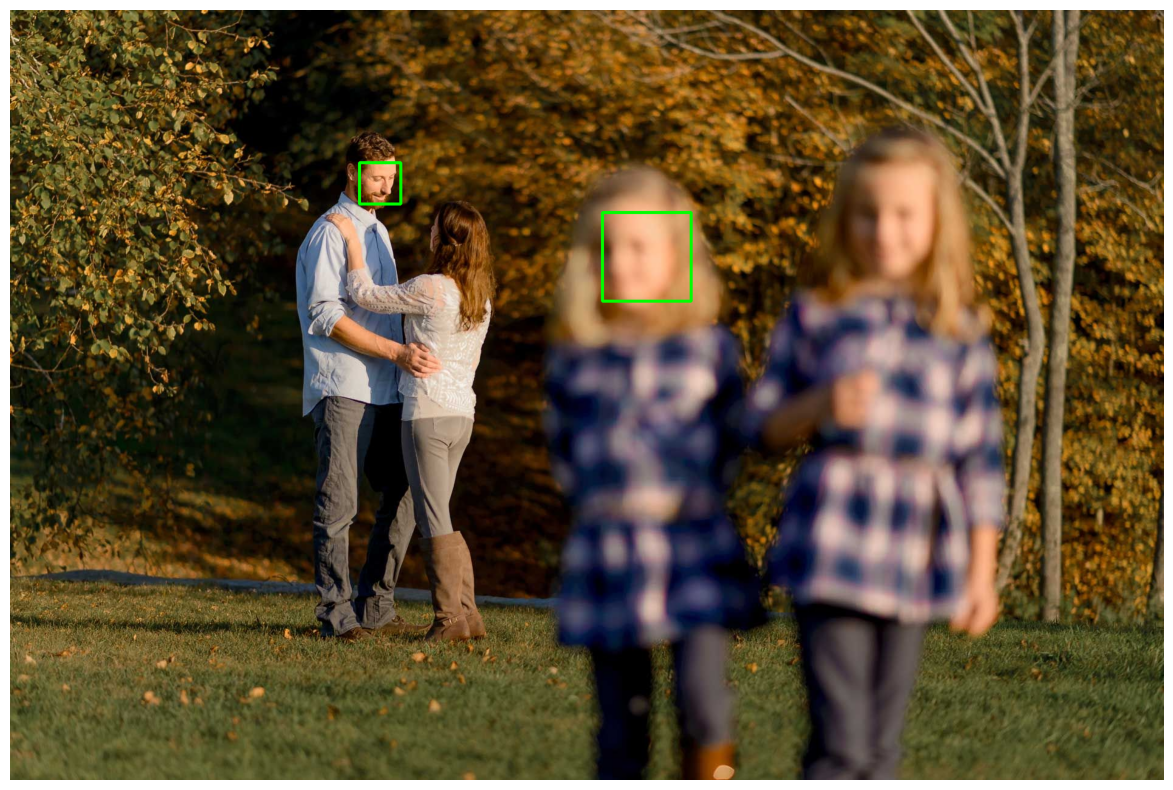

In [140]:
# Drawing the bounding boxes
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

# Displaying the Image
# we first need to convert the image from the BGR format to RGB:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()